## Load the dataframe

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [9]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show certain rows

In [10]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


In [11]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show certian columns

In [12]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [14]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [16]:
df[[' SOUID', '    DATE', '   TG']]

,SOUID,DATE,TG
0,35381,1860-01-01,21
1,35381,1860-01-02,46
2,35381,1860-01-03,31
3,35381,1860-01-04,37
4,35381,1860-01-05,31
...,...,...,...
59316,35381,2022-05-27,-9999
59317,35381,2022-05-28,-9999
59318,35381,2022-05-29,-9999
59319,35381,2022-05-30,-9999


## Simple statistics and filtering

In [21]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

6.360787526128467

In [22]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

26.2

## Using a histogram to to view data

<Axes: >

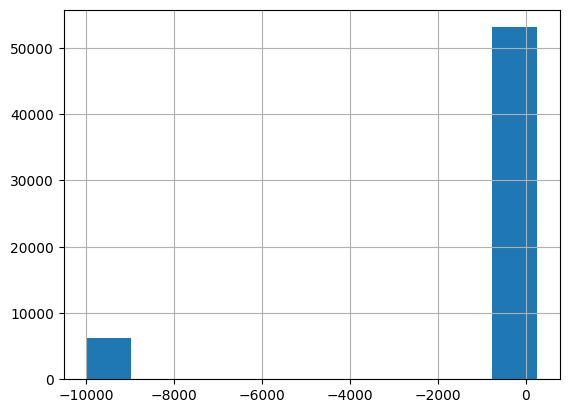

In [23]:
df['   TG'].hist()

<Axes: >

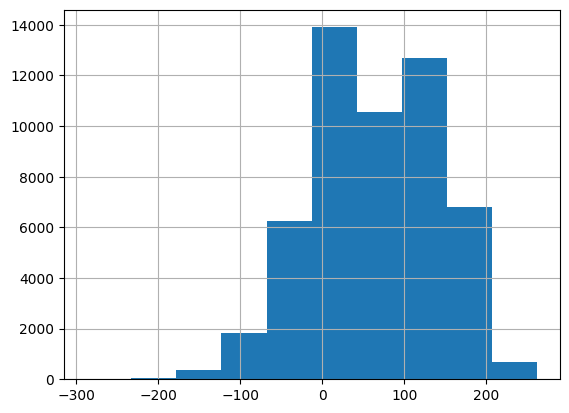

In [24]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

## Get certain cells

In [25]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [28]:
df.loc[df['    DATE']=='1860-01-05']

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,0


In [30]:
df.loc[df['    DATE']=='1860-01-05']['   TG'].squeeze() / 10

3.1

## Date where temperature was highest

In [32]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

## To get a value by coordinates

In [33]:
df.loc[3, '   TG']

37

## Calculate new column out of existing column

## Removing redundant values -9999

In [41]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG'] == -9999, np.nan)

In [42]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,NaN


In [45]:
df["TG"] = df['TG0'] / 10

In [47]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


# Plotting

<Axes: >

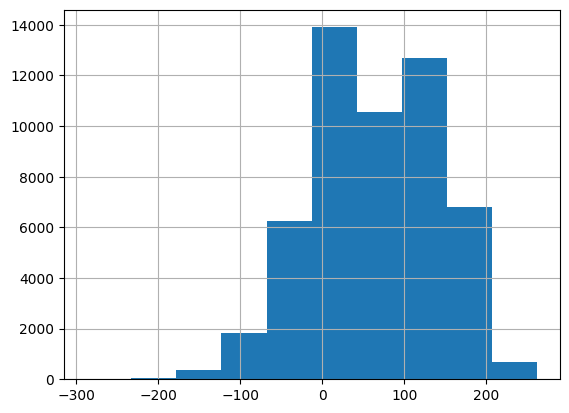

In [48]:
df["TG0"].hist()

## A plot of how temperature changes across days

<Axes: xlabel='    DATE'>

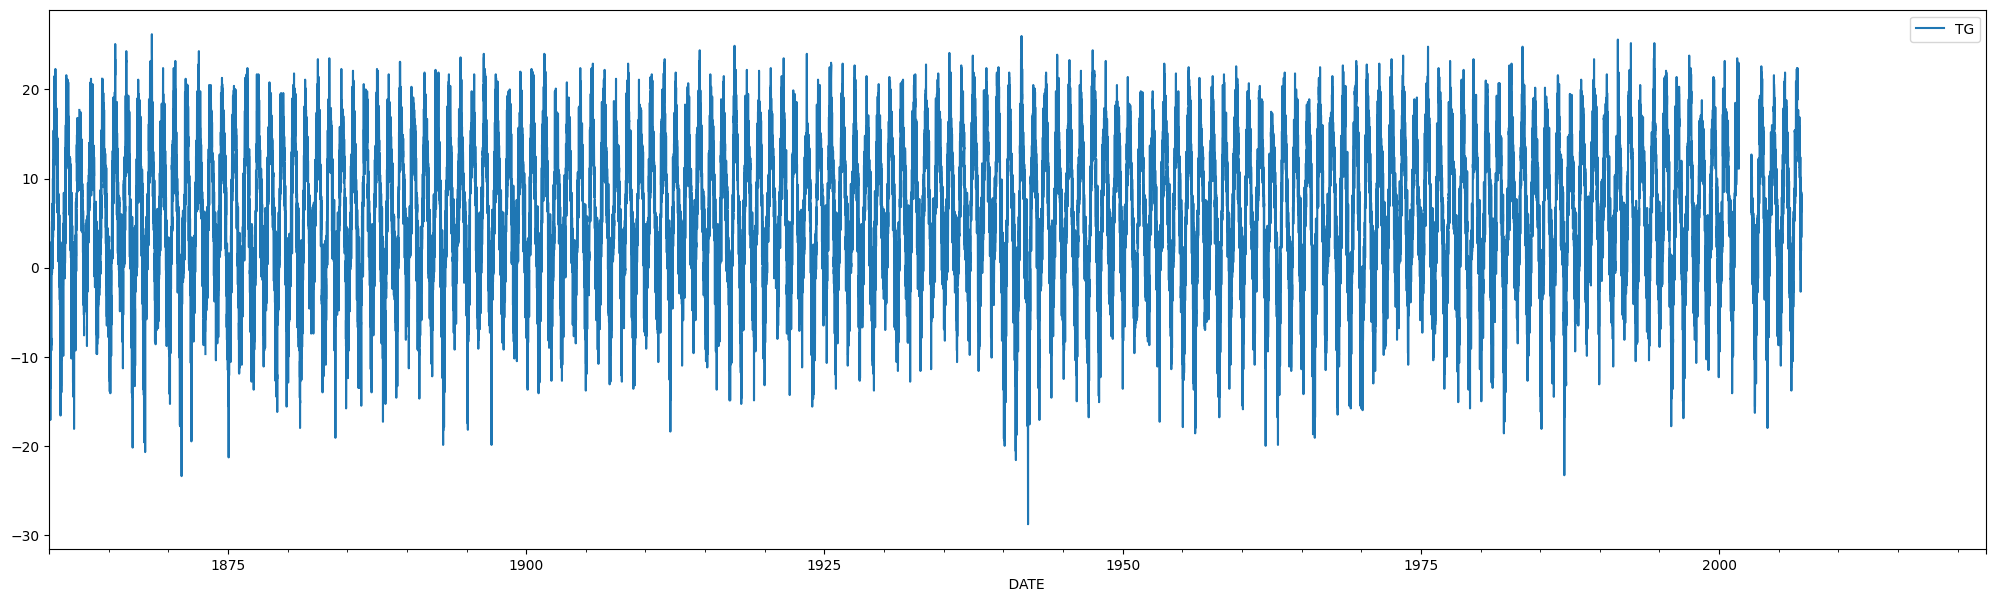

In [52]:
df.plot(x='    DATE', y="TG", figsize=(25, 7))

# To plot specific rows

<Axes: xlabel='    DATE'>

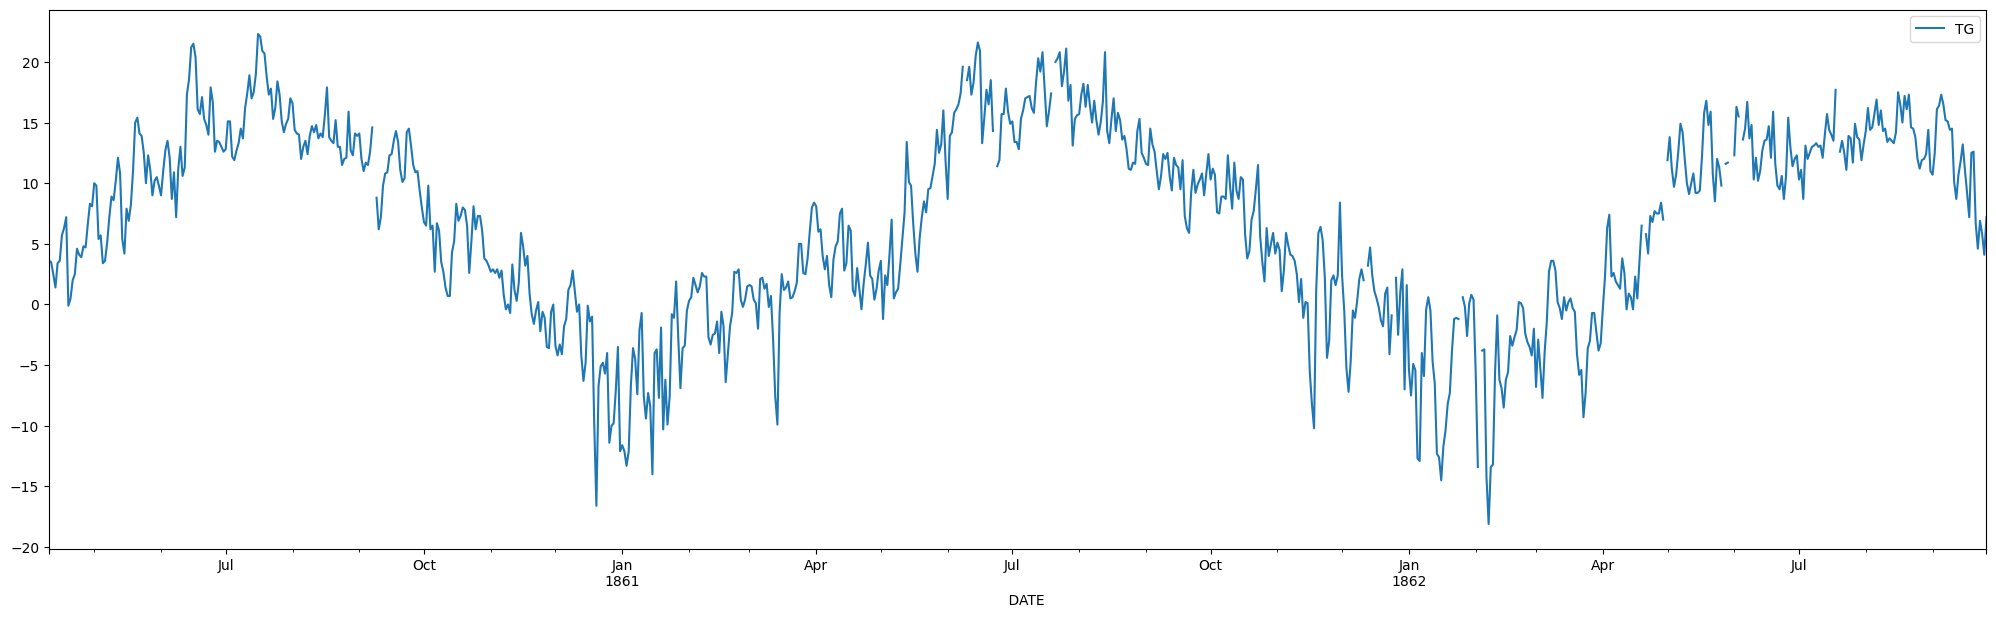

In [51]:
df[100:1000].plot(x='    DATE', y="TG", figsize=(25, 7))